In [1]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>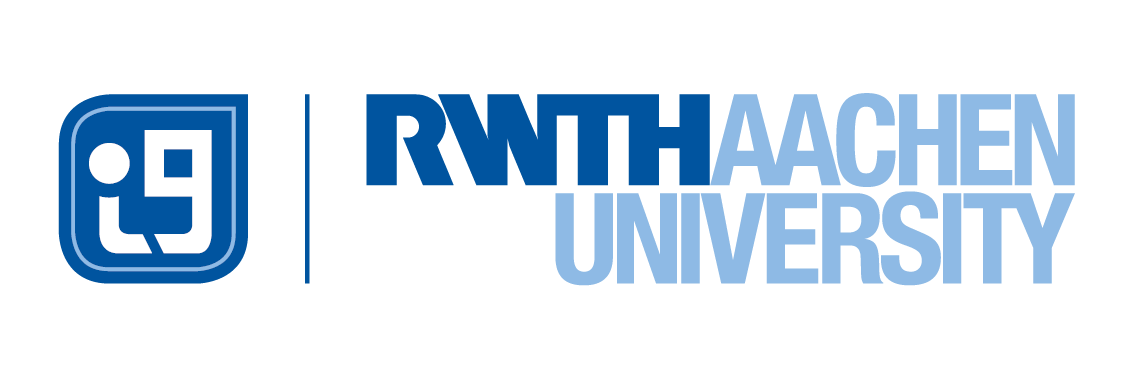</center>

<a id="top"></a>
# NumPy
## Overview
* [Installation](#installation)
* [Datatypes of Elements](#datatypes)
* [The NumPy array](#array)
    * [Array creation](#arrayCreation) and [main properties](#arrayProperties)
    * [Array vs. `list`](#arrayVsList): data types, [storage](#storage), and [computing efficiency](#compEffeciency)
    * [Shape](#shape)
    * [Indexing](#indexing)
    * [Array manipulation](#arrayManipulation)
* Vectorization and [Broadcasting](#broadcasting)
* [Array I/0](#io)
* [Statistical Analysis](#statisitics)
* [Linear Algebra](#linAlg)
* [Random Numbers](#random)
* [Masking and Filtering](#masking)

A well-known disadvantage of Python is its performance: Due to the fact that Python is dynamically typed and an interpreted language, it is often less performant than typical compiled languages such as C/C++ and Java. While this is not a problem for many applications, it can be problematic for certain purposes, such as arithmetic operations with large numbers and operations on big vectors and matrices. Unfortunatly, such calculations have to be done all the time for scientifc programming like in data science and machine learning. To still be able to perform these programming tasks efficiently, we use the `NumPy` library (numerical Python), which is internally written in C and therefore can be much faster than plain Python code. 

The core feature of NumPy is the support for a powerful and efficient data structure: the n-dimensional array called the `ndarray`. NumPy arrays are similar to lists but have
* a fixed size and
* a homogeneous element datatype

Thus, for numerical computations they are far more efficient to use (faster computation, less storage) than lists.

Based on this data structure, NumPy offers an assortment of routines for fast operations on arrays, including mathematical calculations, sorting, basic linear algebra, basic statistical operations, random simulation and much more.

NumPy is one of the most fundamental packages in data science and machine learning. Even many other packages that you will use like `Matplotlib`, `Pandas`, and `SciPy` are built mostly upon Numpy.

<a name="installation"></a>
## Installation

If you are using our RWTHJupyterlab profile, NumPy is already installed and you can import and use it it right away. If you are using your own local installation you can install NumPy as follows:

### Anaconda 
Anaconda already comes with NumPy, that's why you normally do not have to install it again. But if you want/have to install it manually you can do so by typing the following into the conda-prompt:

```console
conda install numpy
```

### pip
To install NumPy with pip, type the following into your terminal: 

```console
pip install numpy
```
This command installs NumPy in the current working Python environment.


### Import NumPy
In order to use NumPy we import it and usually name it as `np`:

In [2]:
import numpy as np

---
<a id="datatypes"></a>
## [Element datatypes](#top)

First have a closer look at the provided datatypes of Numpy. Python has only a few built-in types (like integer or float) and while programming we do not have to take care of them as much as in other statically typed languages. This makes Python very easy, but also slower than other languages. Numpy provides 24 fundamental datatypes, which are mostly based on the types available in C. They form a hierachy shown in the image below, where every type is derived from the base-type `generic`: 

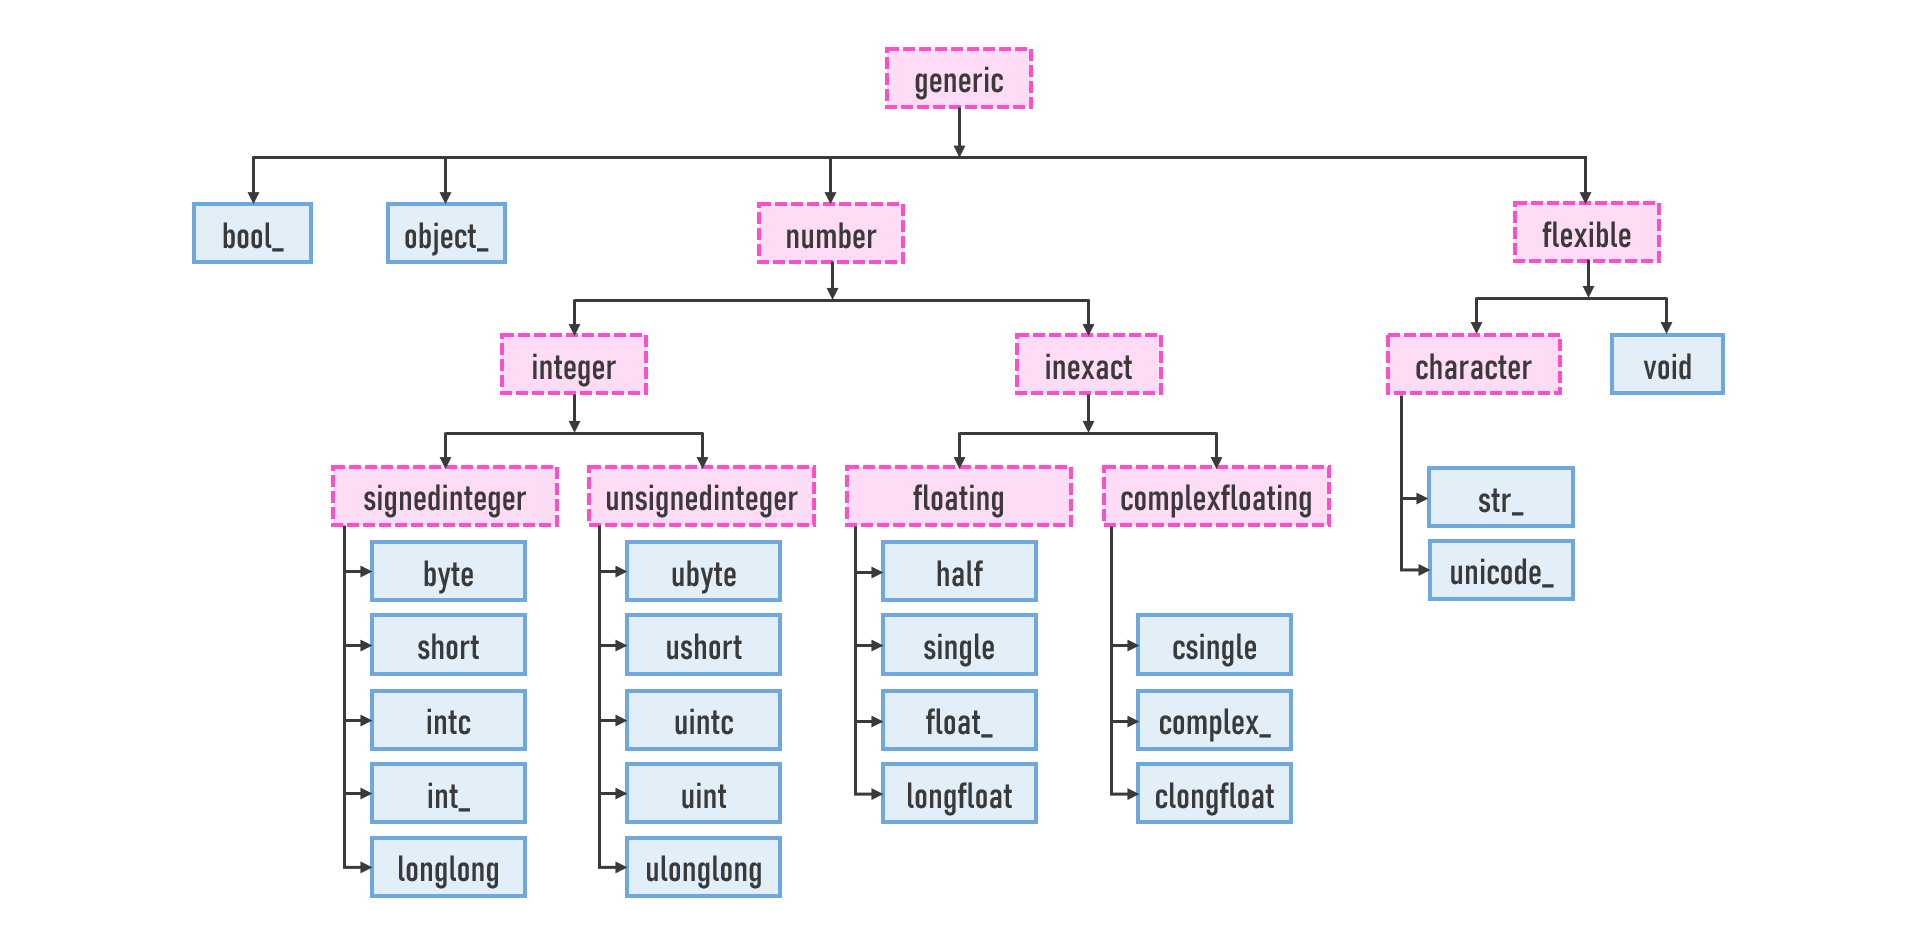

There are 5 basic numerical types representing booleans (bool), integers (int), unsigned integers (uint) floating point (float) and complex. Those with numbers in their name indicate, how many bits are needed to represent a single value in memory.
<br><br>

<div class="learnmore"><b> Learn more</b>:If you are not familiar with the difference between signed and unsigned integers, you can read about it here: <a href="https://en.wikipedia.org/wiki/Signedness">https://en.wikipedia.org/wiki/Signedness</a> and here: <a href="https://en.wikipedia.org/wiki/Two%27s_complement">https://en.wikipedia.org/wiki/Two%27s_complement</a>)</div>
<div class="learnmore"><b> Learn more</b>:If you want to find out more about the datatypes in NumPy you can read about it in the <a href="https://numpy.org/doc/stable/reference/arrays.scalars.html">documentation</a></div>

---
<a name="array"></a>
## [The NumPy-Array](#top)

The core of the NumPy package is the `ndarray` (n-dimensional array), which is a container of items. Almost like a (nested) list, it provides a grid structure to store values and access them with indices. The main difference between the Python list and a NumPy Array is that all the elements in the Array have to be of the same datatype and size in memory. Thus, they are organized as a continous block in memory and each element can be directly adressed from the start adress, instead of looping over the sequence in lists. This is the main reason why operations on Arrays can be implemented much faster than on Python lists.

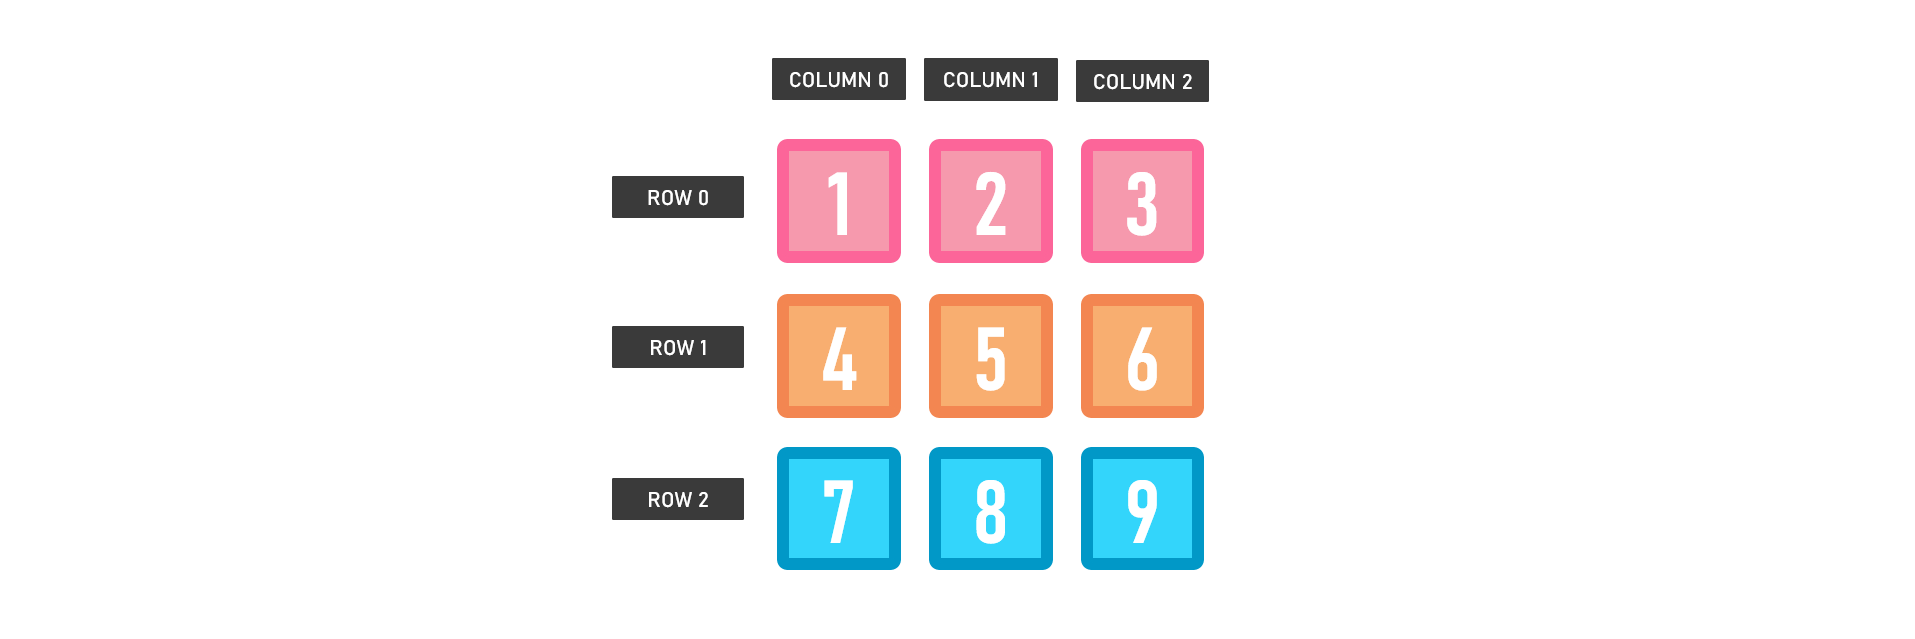

<a id="arrayCreation"></a>
### [Array creation](#top)

There are many ways to create a new `ndarray`, to be more precise more than 40. They can be roughly differentiated between 1d-, 2d-, and n-dimensional arrays creations. One way is to convert an existing python sequence into an `ndarray` with the `numpy.array`-constructor:

In [ ]:
array1D = np.array([1, 2, 3, 4])
array2D = np.array([[1, 2], [3, 4]])
array3D = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

print("1-dimensional:")
print(array1D)
print("2-dimensional:")
print(array2D)
print("3-dimensional:")
print(array3D)

>**Note**: when printed `ndarrays` almost look like n-dimensional lists, but they are represented without commas seperating the items.

When you create a new array with `numpy.array` you can also explictly specifify the data-type of the objects. This can be useful when the datatype of the python sequence is not clear, for example`numpy.int_` or `numpy.uint_`:

In [ ]:
# the number of bits is important as 129 gets -127 in int8 (two's complement of signed integer):
np.array([126, 127, 128, 129, 130], dtype=np.int8) 

In [ ]:
# the number of bits is important as 129 gets -127 in int8 (two's complement of signed integer):
np.array([127, 128, 129], dtype=np.uint8) 

Instead of first creating an iterable with data, only to convert it to an ndarray, you can rather use  `numpy.arange`. The function `numpy.arange` works almost like the Python function `range`, but returns an `ndarray` and not a range instance:

In [ ]:
np.arange(10)

In [ ]:
np.arange(2, 10, dtype=float)

In [ ]:
np.arange(2, 3, 0.1)

`numpy.linspace` will create arrays with a specified number of elements, and spaced equally between the specified beginning and end values:

In [ ]:
np.linspace(1., 4., 10) # archetypical grades at German universities

For higher dimensional `ndarrays` you can use the functions `numpy.ones` and `numpy.zeros` to create an array which is initalized by 0's or 1's. As an argument you pass a tuple which represents the number of elements in every dimension:

In [ ]:
np.zeros((2, 3))

In [ ]:
np.ones((2, 3, 2, 4))

<a id="arrayProperties"></a>
### [Main properties of Arrays](#top)

Let's check for some of the important properties of a 2d-Array:

In [ ]:
LofL = [[11,12,13], [21,22,23], [31,32,33]]
x = np.array(LofL, dtype=np.int16)
x

In [ ]:
print(f'{type(x)} has {x.ndim} dimensions with {x.size} elements needing {x.nbytes} bytes storage space.'\
      .format(x.ndim, x.size, x.nbytes) )

Three and more dimensions are possible:

In [ ]:
x = np.array ([[[111,112,113],
         [121,122,123],
         [131,132,133]],
         [[211,212,213],
         [221,222,223],
         [231,232,233]],
         [[311,312,313],
         [321,322,323],
         [331,332,333]]], dtype=np.int16)
print(f'{type(x)}\nx =\n{x}')

In [ ]:
print(f'{type(x)} has {x.ndim} dimensions with {x.size} elements needing {x.nbytes} bytes storage space.'\
      .format(x.ndim, x.size, x.nbytes) )

---
<a id="arrayVsList"></a>
## [Array vs. List](#top)
Arrays are very similar to lists containing an _indexed sequence of items_, but are restricted to a *homogeneous item data type*. This allows for more efficient implementations of functions and needs less storage space. For this, when creating an array object, you shoulld specify the item type representation (for which default types exist).

### [Array element data types](#top)

In [ ]:
x = np.array([1, 2, 3])
x.dtype

In [ ]:
x = np.array([1.4, 2.2, 3.5])
x.dtype

In [ ]:
x = np.array(['somewhat', 'short', 'text']) # longest unicode string has 8 characters
x.dtype

In [ ]:
x = np.array([True, False])
x.dtype

In [ ]:
x = np.array([1, 2, 3], dtype=np.float16)
x

In [ ]:
x = np.array([1, 0, 3], dtype=bool)
x

In [ ]:
x = np.array([1, 2, 3], dtype=np.int16)
x

In [ ]:
x = np.array(['somewhat', 'short', 'text'], dtype='<U20') # longest unicode string can have 20 characters
x.dtype

<a id="storage"></a>
### [Storage Space](#top)
Storage for elements of an array can be optimized, because all items are of the same type and thus can be organized as a block of *equal size* items. Also indexing and iterating can be implemented more efficiently, because instead of iterating over single items until you reach the intended index, the atorage address can easily be computed as `starting_adr + index*item_size` 

The difference in storage space is most effective when working with very many integers, which are not huge (e.g. < 2^31). 

How much storage space is needed for each case? To check how many bytes of storage are needed for a data structure, we can use the function `getsizeof( )` from the module `sys`:

In [ ]:
from sys import getsizeof as size
lst = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print('size of an empty list:', size([]))
print('size of the administration of a list with 10 elements:', size(lst))
print('size per reference to item:', (size(lst)-size([]))/len(lst))
print('size each of the list elements:', size(lst[0]))
print('number of elements:', len(lst))
print('List of 10 int bytes in total:', size(lst) + len(lst)*size(lst[0]))

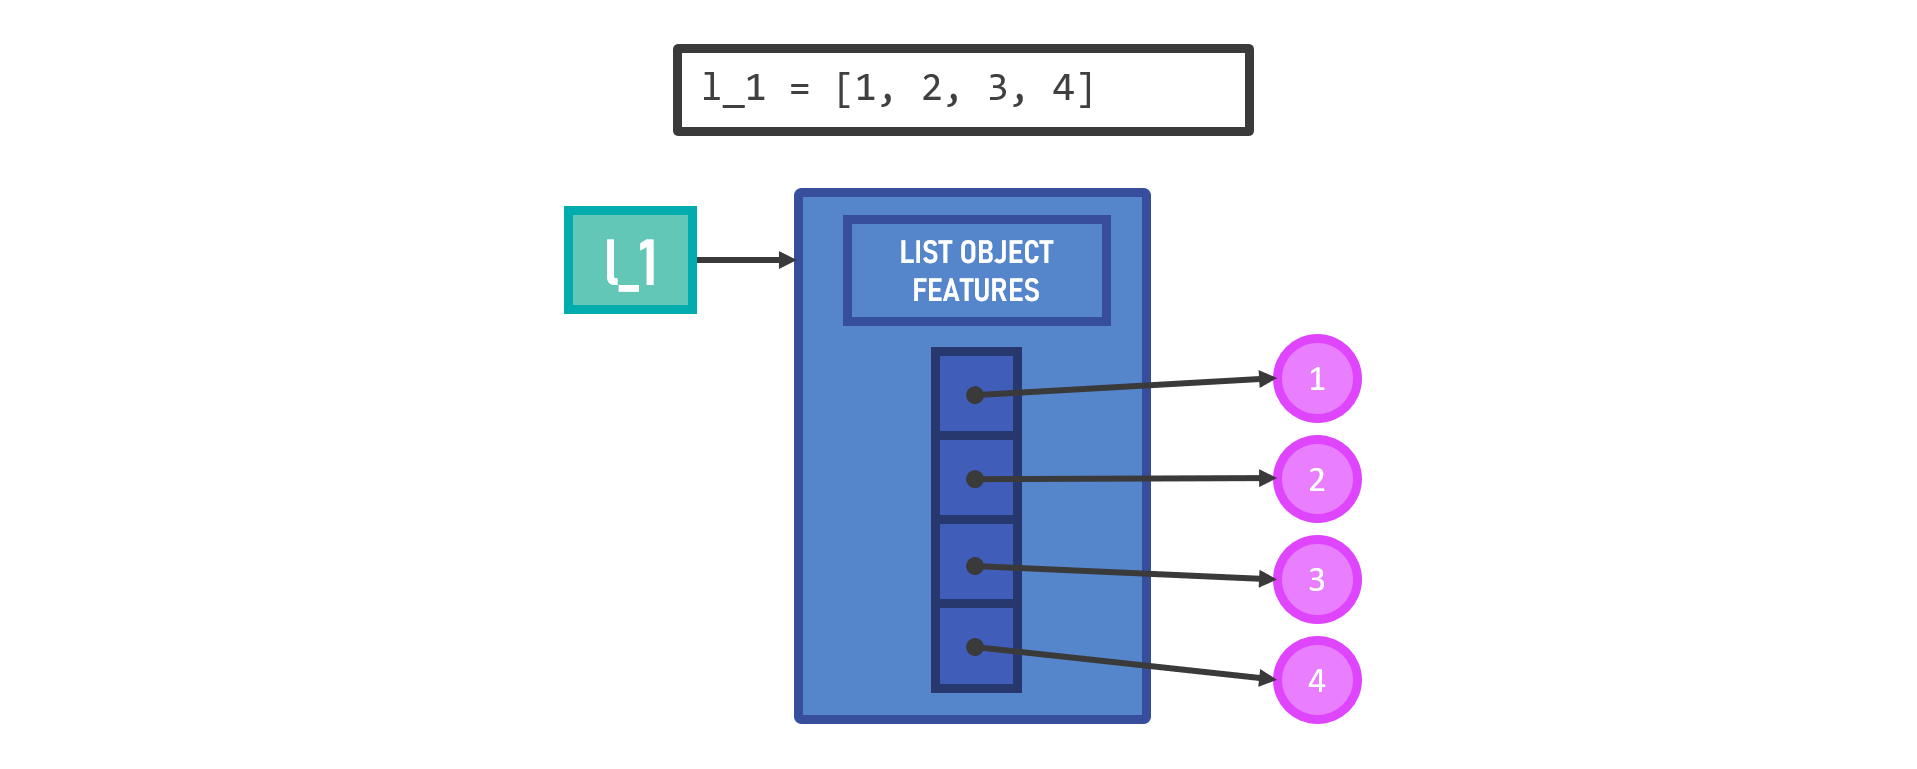

The `list object` itself occupies 72 bytes for its features. For each `int element` it takes 8 bytes for the reference to the int object, plus 28 for the `int object` itself. A list of n `int` values needs `72 + n * 36` bytes.

In [ ]:
a = np.array(lst, dtype=np.int16) # if we know that 16 bit int are large enough
print('size of an empty array:', size(np.array([])))
print('size array with 10 int16 elements:', size(a))

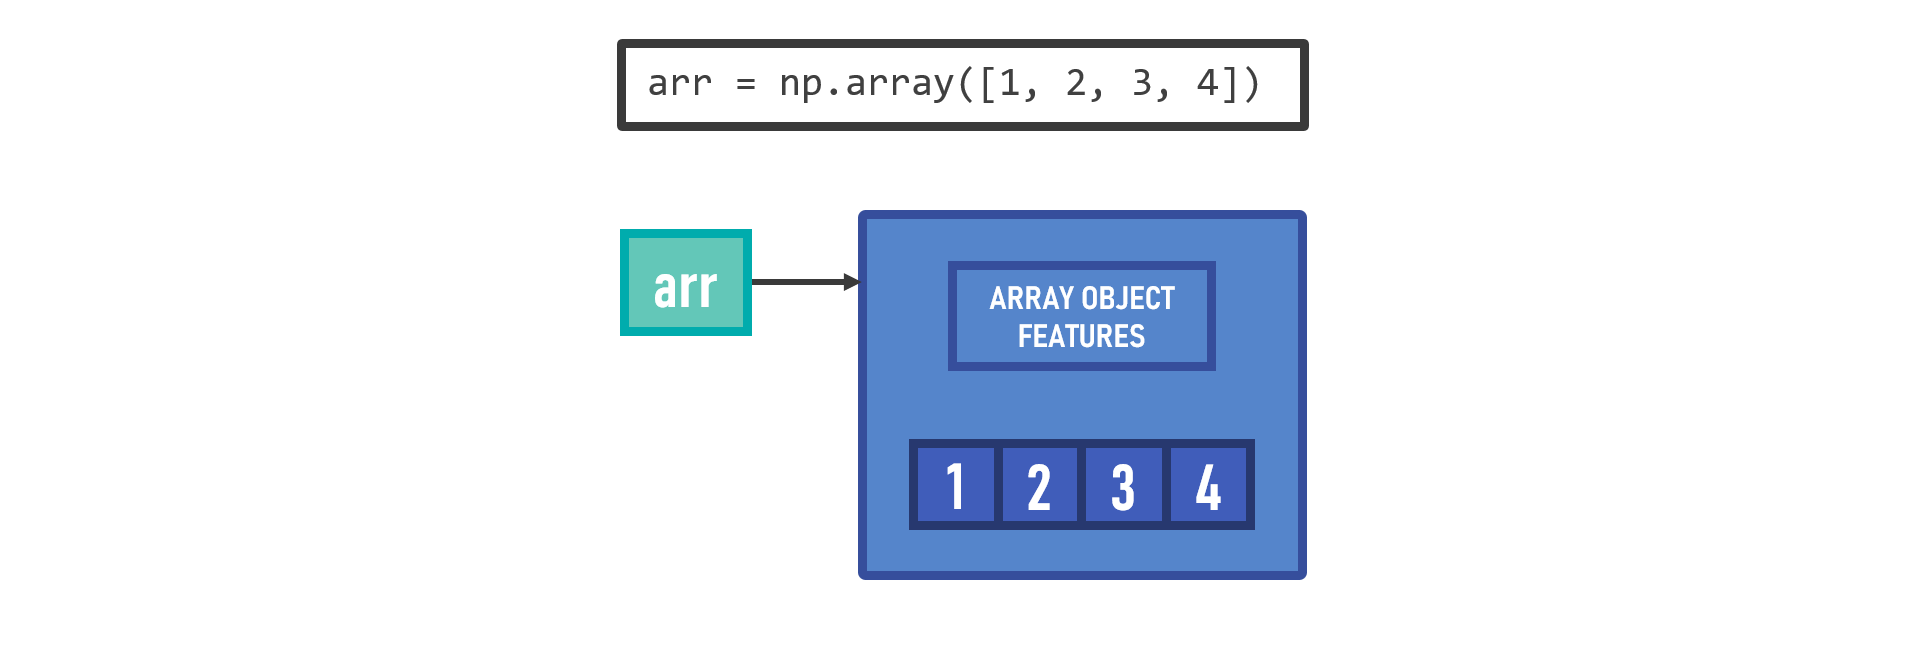

The int values are **contained within the array** as a block, not individual objects. Thus, depending on the `dtype` each int value only takes between 1 .. 4 bytes (dtype `int8` .. `int64`) without additional administrative storage space for references and objects. So the overall size of the array only sums up to `96 + n * (1..4)` Byte.

Thus the difference in storage space per item between a list and an array lies between 32 .. 35 bytes.

E.g.for 100.000 `int` values:
* __list:__ 3'600'072 Bytes total space
* __array:__ 100'096 .. 400'096 bytes total space

<a id="compEffeciency"></a>
### [Computing efficiency](#top)
For the same reason, there is also an advantage in computing time, if a computation is to be done for each element. In a list, each element is *referenced* by the list, so evaluating means *accessing* the list object in the heap, and then adressing the item reference in the list object (in an internal array data structure), and then accessing the value from the referenced object in the heap. In an array, each value is directly adressed within the array, bacause its adress is immediately computed as `starting_adress + index*item_size`.

Also, if a new value is computed and is meant to overwrite the value within the array, this can be done *in place*. With a list, a new `int object` is created and placed in the heap, the reference to the object is to be written at the place of the item withing the list (or many times in a copy of), and the old object is to be deleted from the heap. 

In [ ]:
import numpy as np
import time
size = 1000000

def lst():
    t1 = time.time()
    X = range(size)
    Y = range(size)
    Z = [X[i] + Y[i] for i in range(len(X))]
    return time.time() - t1

def arr():
    t1 = time.time()
    X = np.arange(size)
    Y = np.arange(size)
    Z = X + Y
    return time.time() - t1

We use the method `time( )` from the `time module` to measure how long it takes to create two lists resp. arrays of 10.000 items and add them itemwise (difference from starting the operation until returning).

In [ ]:
l_time = lst()
a_time = arr()
print('time for list operation:', l_time)
print('time for array operation:', a_time)
print('list takes {:.2f} times longer than np.array'.format(l_time/a_time))

Within our interactive IPython shell, it is easier to just use the `%timeit` magic. See https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit on an explanation of magic functions like `%timeit`. For that, we do not need the time object from the time module.

In [ ]:
import timeit
size = 100000

def lst():
    X = range(size)
    Y = range(size)
    Z = [X[i] + Y[i] for i in range(len(X))]
     

def arr():
    X = np.arange(size)
    Y = np.arange(size)
    Z = X + Y

Caution: when running the following `%timeit` code cells, execution might take a while. Please wait until the `[*]` before the cell showing that it is busy is replaced by the execution counter (a number).

In [ ]:
%timeit lst()

In [ ]:
%timeit arr()

---
<a name="shape"></a>
## [Shape](#top)
The shape of an `ndarray` is a tuple of the sizes of each of its dimensions (called axis in Python terminology):

In [ ]:
x = np.array(42) # zero-dimensional => scalar
x

In [ ]:
x.shape

In [ ]:
x = np.array([1, 2, 3, 4]) # one-dimensional, 4 items
x

In [ ]:
x.shape

In [ ]:
x[2]

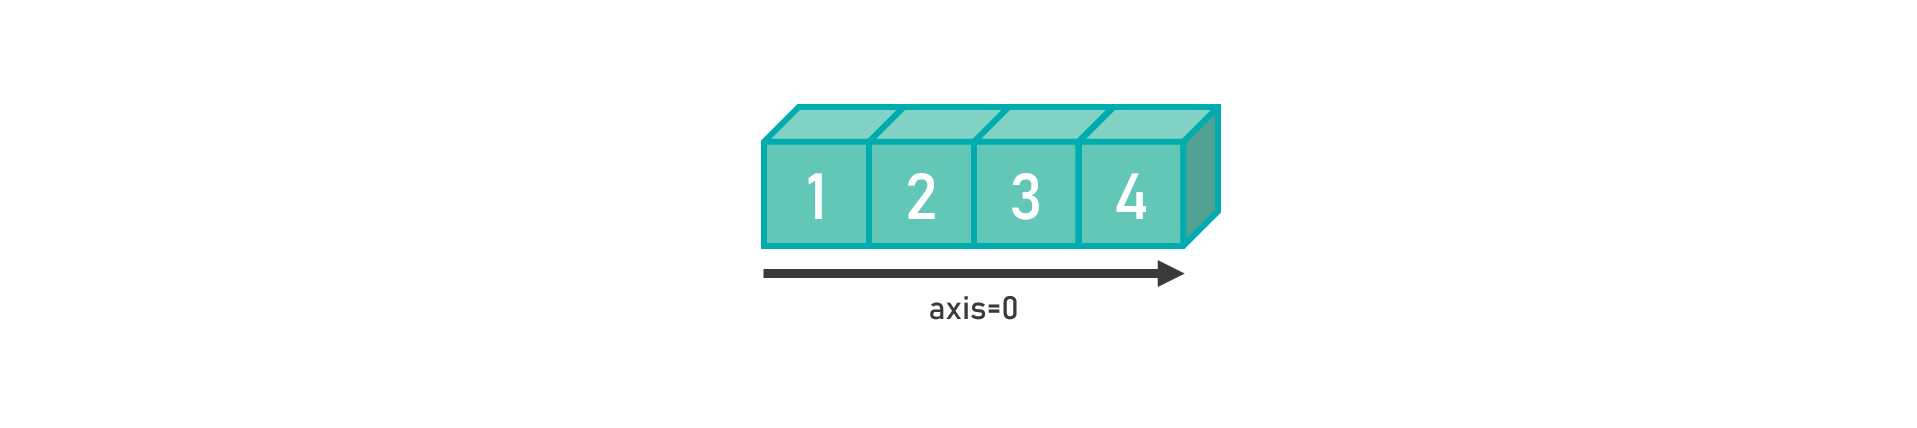
1-dimensional: 1 "row" of 4 items

In [ ]:
x = np.array ([[1.1, 1.2, 1.3, 1.4],
               [2.1, 2.2, 2.3, 2.4],
               [3.1, 3.2, 3.3, 3.4]]) # 3 'rows' each with 2 'columns'
x

In [ ]:
x.shape

In [ ]:
x[1] # second row

In [ ]:
x[0][2] # first row, 3rd col => do not use this notation!

It is more efficient to address the same element with the comma notation (`x[0, 2]`), because in the first way, we first copy the line in which the third element is adressed. With the comma notation, we directly address the intended element (because it can be computed directly):

In [ ]:
x[0, 2] # first row, 3rd col

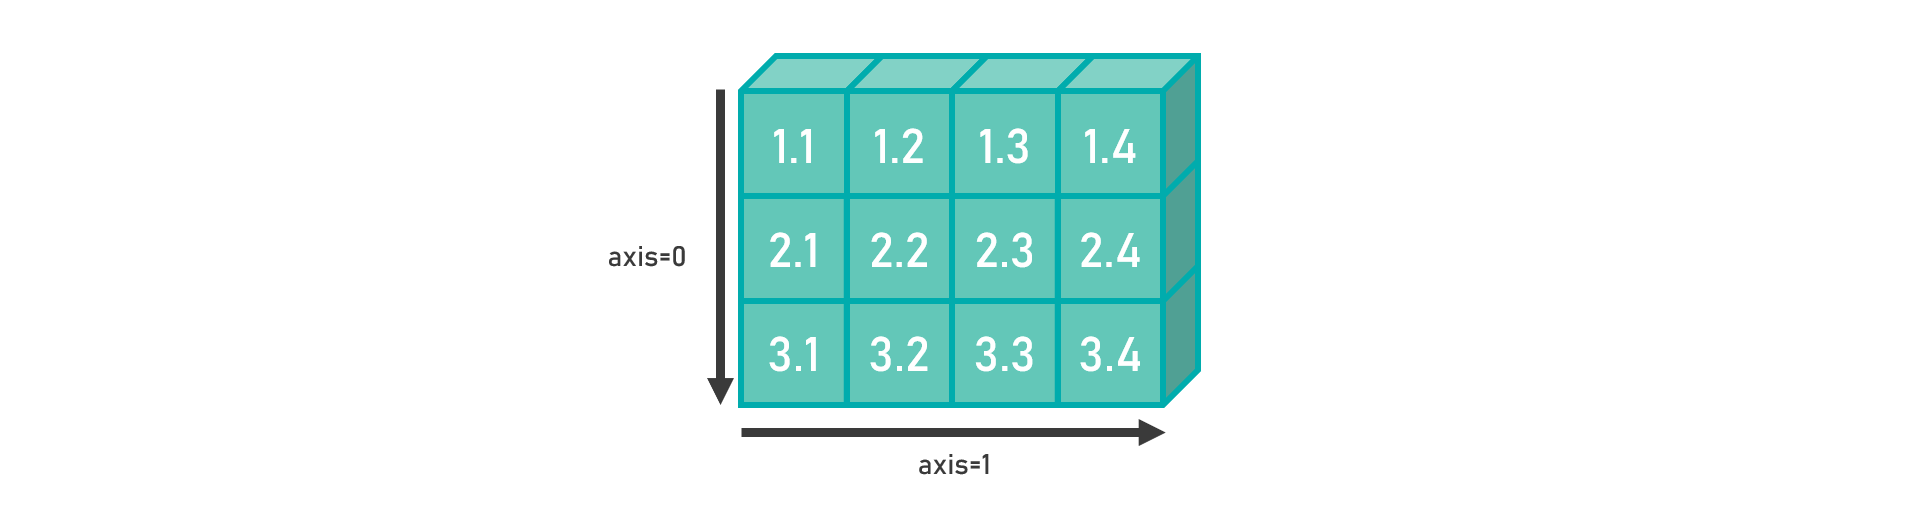

2-dimensional: 3 rows (`axis=0`) of 4 columns (`axis=1`) each

In [ ]:
x = np.array([[[111, 112, 113, 114],
               [121, 122, 123, 124],
               [131, 132, 133, 134]],
               
              [[211, 212, 213, 214],
               [221, 222, 223, 224],
               [231, 232, 233, 234]]])
x.shape # 2 planes (axis=0), with 3 rows (axis=1) with 4 columns (axis=2) each

In [ ]:
x[0] # first plane

In [ ]:
x[1, 0] # second plane, first row

In [ ]:
x[0, 1, 2] # first plane, second row, third item

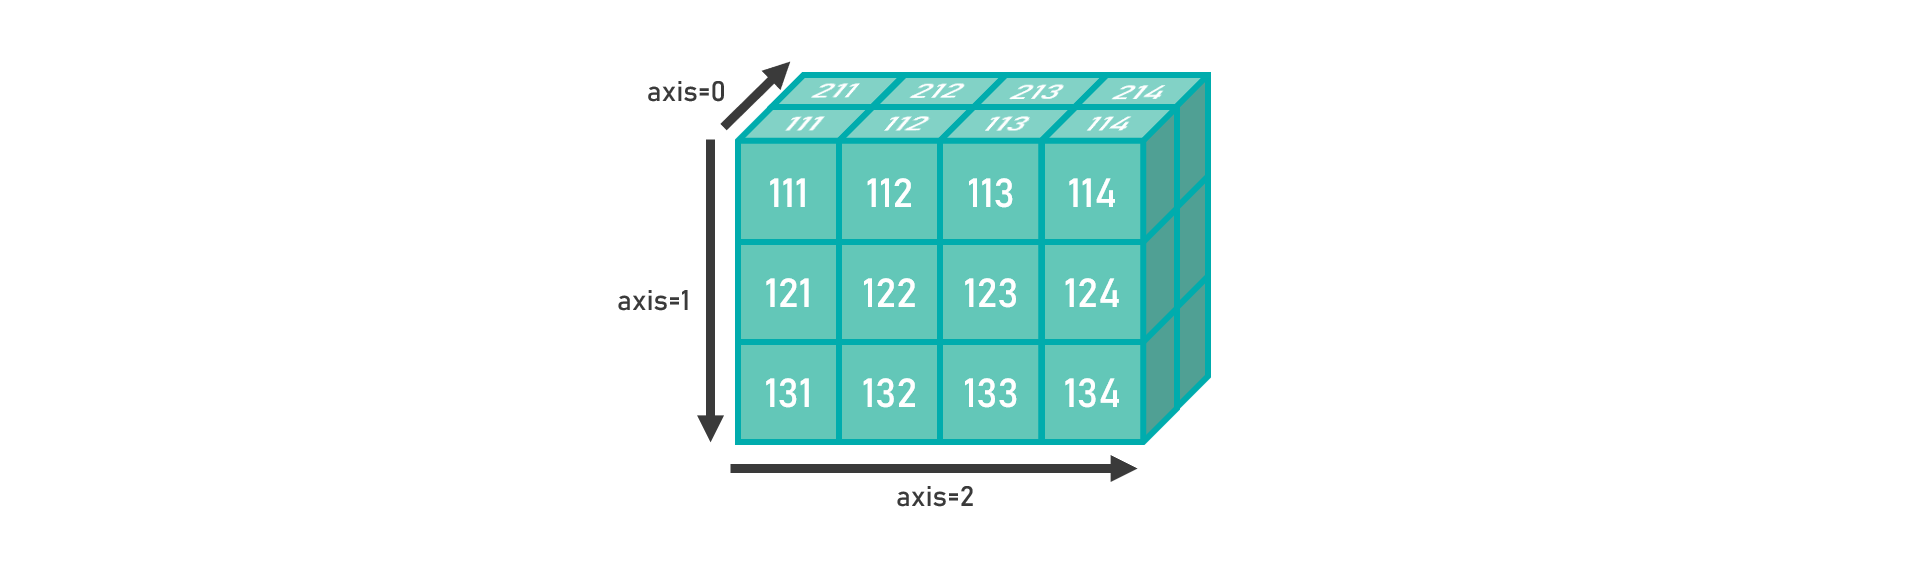

3-dimensional: 2 planes (`axis=0`) with 3 rows (`axis=1`) with 4 columns resp. items (`axis=2`) each

Be careful with initializing arrays: if one of the dimensions is not met correctly, then a n-dimensional array of list objects is created:

In [ ]:
x = np.array ([[[111,112,113],
                 [121,122,123],
                 [131,132,133]],
               
             [[211,212,213],
                 [221,222,223],
                 [231,232,233]],
               
             [[311,312,313],
                 [321,322,323],
                 [331,332]]])     # OOPS, the last 'col' is missing
x

In [ ]:
x.shape

You can change the shape of an array with the function `numpy.reshape`. The new shape is given as a tuple of integers, where this new shape has to be compatible with the old shape, i.e. the total number of elements must be the same:

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [16, 17, 18, 19, 110]])
np.reshape(x, (5,3))

In [ ]:
np.reshape(x, (4,3))

You can also leave one dimension out by using `-1`. Then NumPy calculates the last dimension for you:

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [16, 17, 18, 19, 110]])
np.reshape(x, (5,-1))

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [16, 17, 18, 19, 110]])
print(np.reshape(x, (1,-1)))  # same as reshape(x, (1, 15))

Shapes come in handy, when creating and initializing (multi-dimensional) arrays.

### Create arrays with shape
Often, the elements of an array will be computed after creating the array, but its size is known. Thus, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

In [ ]:
x = np.zeros(10) # default element type ist float64
print( x, x.dtype )

In [ ]:
np.zeros( (5, 12), dtype=np.int16 ) # also specifying the element type

In [ ]:
np.zeros( (3, 4, 5), dtype=bool )

In [ ]:
np.ones((4, 4), dtype=np.int16)

In [ ]:
np.ones((4, 8), dtype=bool)

In [ ]:
np.full((5, 10), 3.14)

In [ ]:
np.random.randint(100, size=(3, 15))

### Creating diagonal matrices

In [ ]:
np.eye(4) # 2-d identity matrix 

In [ ]:
np.diag( [3, 4, 5, 6] )

---
<a name="indexing"></a>
## [Indexing and Slicing `ndarrays`](#top)

As with lists, indexing and slicing also works on arrays with the `[]`-syntax:

In [ ]:
x = np.arange(10)
print(x)
print(x[4])
print(x[-2])

When your array has more dimensions, you can index the elements with the comma-separated syntax `[x,y,...]`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(x)
print(f'x[1, 0] = {x[1,0]}')
print(f'x[0,-1] = {x[0,-1]}')

If you use less indices than the dimension, you get a subdimensional array. Here it is important to note, that the return array is a **view and not a copy** of the original array:

In [ ]:
x = np.array([[1.1, 1.2, 1.3, 1.4], [2.1, 2.2, 2.3, 2.4], [3.1, 3.2, 3.3, 3.4]])
x

In [ ]:
x[0] # the first 'line'

> Note: You can also access the elements on a multidimensional array like in C, by accessing a subdimensional array and then use an index on this subdimension, i.e `x[1,3] == x[1][3]`. But the NumPy comma-seperated syntax is more efficient, because it does not create a new temporary array.

In [ ]:
x[0, 1] # second element in the first line

In [ ]:
x[2, 3] # 4.th element of the third line

Also slicing is possible like you know it from the Python list with the `i:k:j`-syntax, where `i` is the start index, `j` is the stopping index (excluded) and `k` is the step size:

In [ ]:
x[1:3] # the second and third line

In [ ]:
x[1, 1:3] # second and third element of the second line

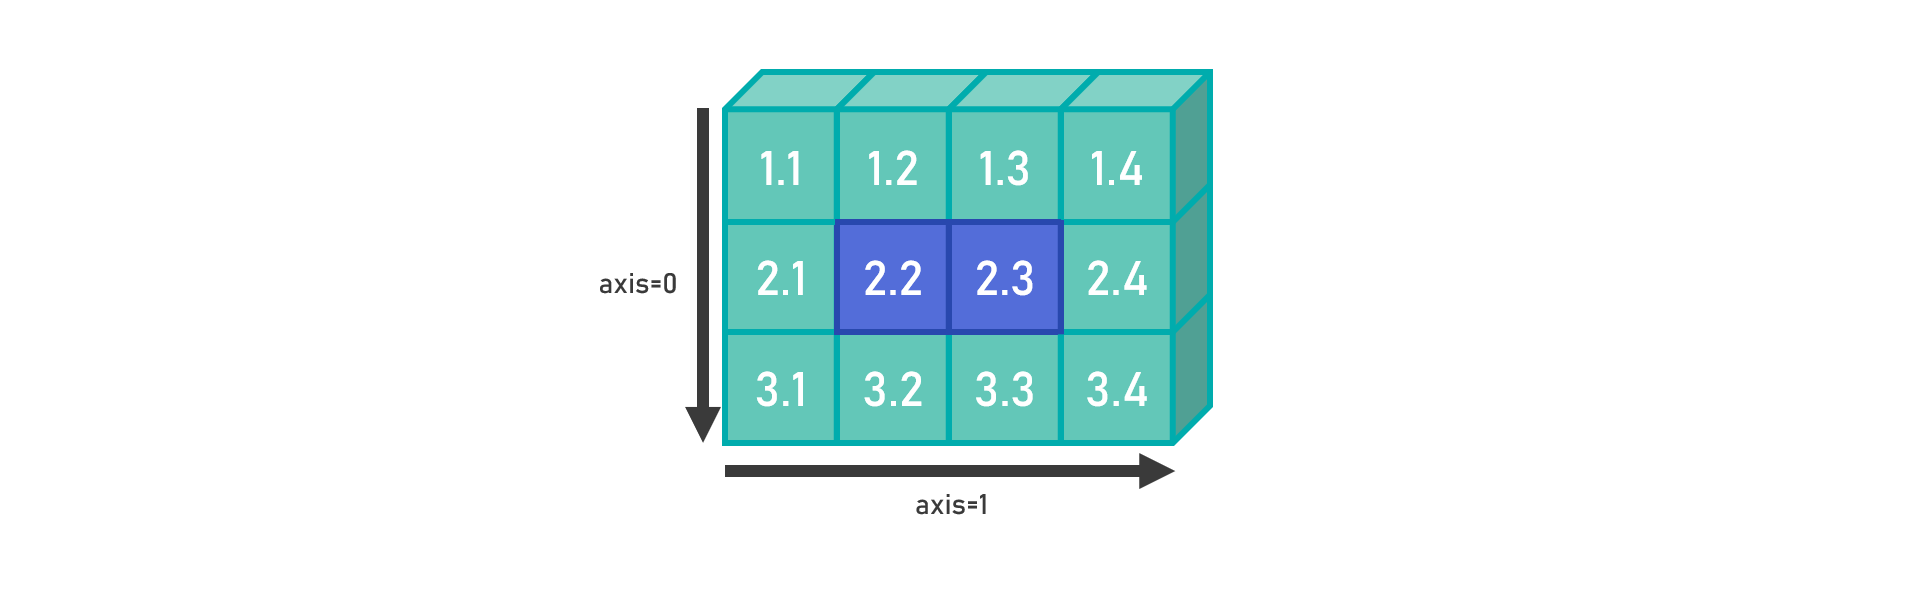

In [ ]:
x[0:2, 2:] # 2-d array with the 3rd till the last element of each of the first two lines

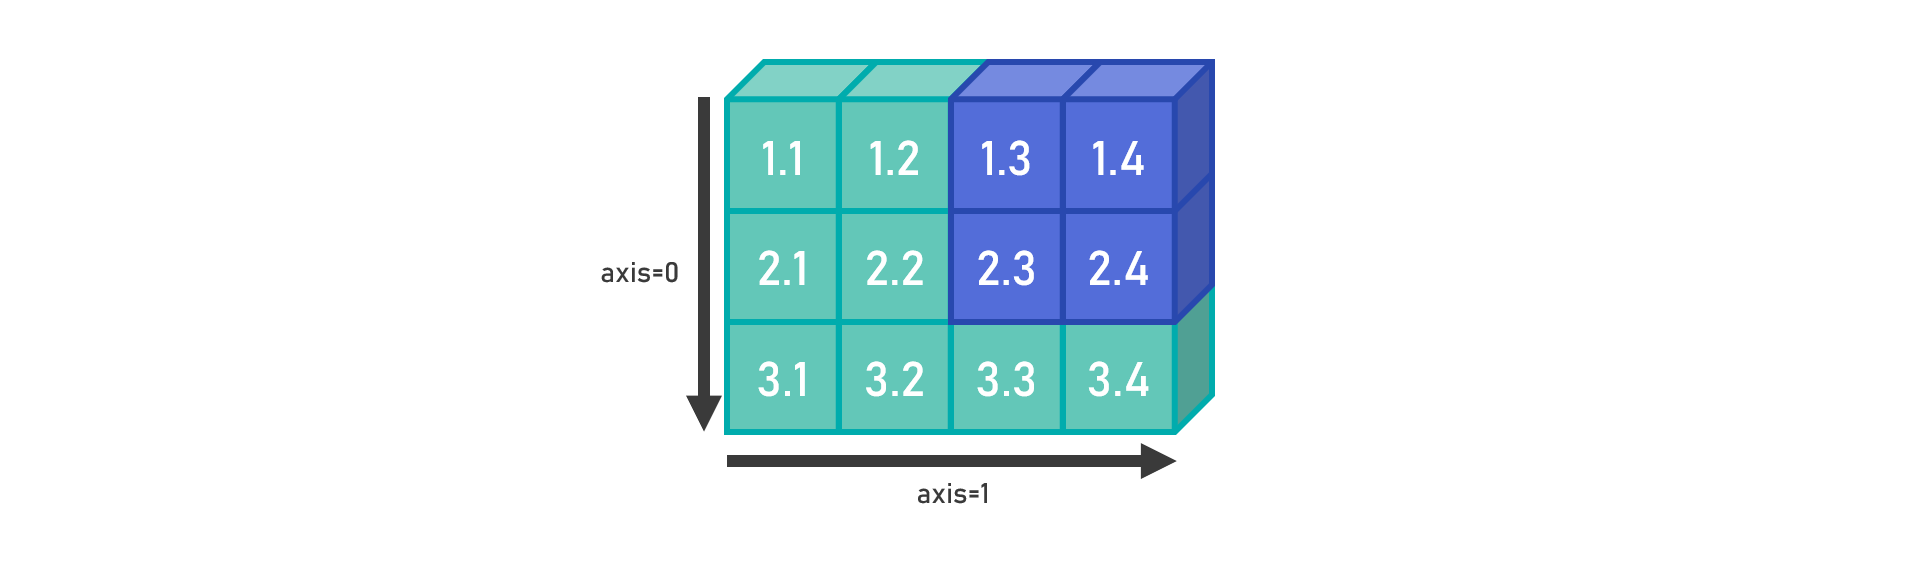

In [ ]:
x[:, 1] # the second element of each of the lines

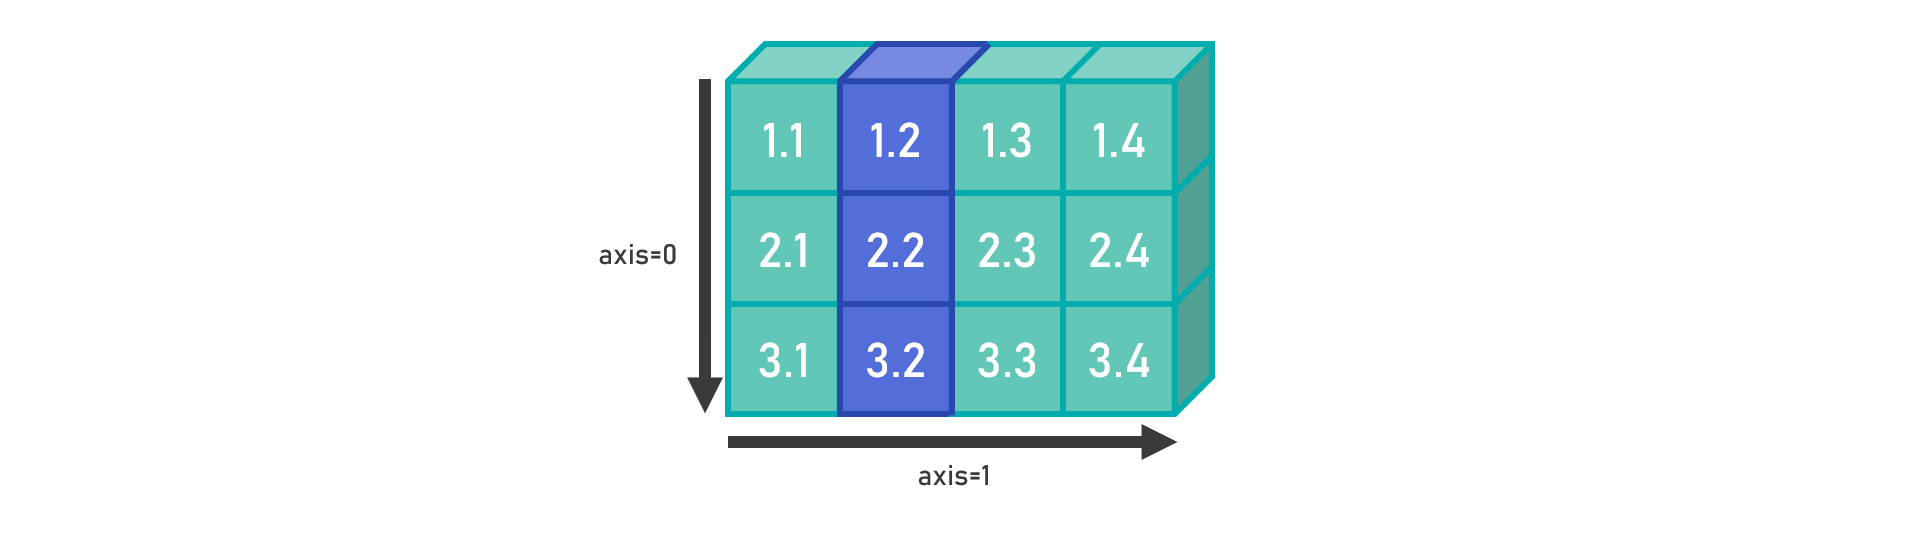

In [ ]:
x[-1, -2:] # the last two elements in the last line

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x[1:7:2]

Slicing can be applied to every dimension of the `ndarray`:

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])
x[1:3, 1:-1]

### Slices with steps

In [ ]:
# slices can also define a stepwidth
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y[1:7:2] # [start, stop, step] => every second element between the second and 7th (last excluded as always)

In [ ]:
#  every third element backwards
y[-1::-3]

In [ ]:
# the array backwards
y[-1::-1]

Of course steps in slices are possible in multi-dimensional arrays as well.

In [ ]:
x = np.arange(28).reshape(4, 7)
x

In [ ]:
# every third element in every second line in reverse order
x[::-2, ::-3]

### Integer array indexing
As a generalization of slicing, integer array indexing allows for the selection of arbitrary items in the array based on their N-dimensional index. Each integer array represents a number of indexes into the corresponsing dimension.

In [ ]:
x = np.array([[1.1, 1.2, 1.3, 1.4], [2.1, 2.2,2.3, 2.4], [3.1, 3.2, 3.3, 3.4]])
x

In [ ]:
x[ [0, 2] ] # adresses first and third row (first dimension)

In [ ]:
#select a different value out of every column:
x[ [0, 1, 2], [0, 3, 2] ]

In [ ]:
#"resorting" of lines
x[ [0, 2, 1] ]

In [ ]:
# We can also duplicate lines with this
x[ [0, 1, 2, 1, 2] ]

In [ ]:
# or rearrange items within lines
x[ [1], [3, 2, 1, 0] ]

### Boolean indexing

In [ ]:
x = np.array([[1.1, 1.2, 1.3, 1.4], [2.1, 2.2, 2.3, 2.4], [3.1, 3.2, 3.3, 3.4]])
x

In [ ]:
index = x > 2.1
index # pattern for values > 2.1

In [ ]:
#note that the index must be an array of boolean!
x[ index ]

In [ ]:
index = 10*x % 2 == 0
index

In [ ]:
x[ index ].reshape( 3, 2) # even decimal part elements reshaped as 3x2 array

### Combining advanced indexing
You can also combine basic  and advanced indexing, e.g. slicing and integer array indexing:

In [ ]:
# rearrange items within specified lines
x[ 0:2, [3, 1, 2, 0] ]

---
<a name="arrayManipulation"></a>
## [Array manipulation](#top)

### Assigning values
As with any other data structure you can directly assign valuers or substructures. 

In [ ]:
x = np.array([[1.1, 1.2, 1.3, 1.4], [2.1, 2.2,2.3, 2.4], [3.1, 3.2, 3.3, 3.4]])
x

To assign one value:

In [ ]:
x[1, 1] = 98
x

You can also assign a substructure such as a row:

In [ ]:
x[1] = [201, 202, 203, 204]
x

... or a column:

In [ ]:
x[:,1] = [102, 202, 302]
x

#### Reference semantics (aliasing)
>__Careful:__ Slicing just creates a *view* on the existing array object! This is different to lists!

In [ ]:
x = np.array(
    [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12]])
y = x[1] # y references line 2 of the 2d-array x
y

In [ ]:
y[1:-1] = 98
y

In [ ]:
x

If you want to compute some values based on a specific line of the matrix without affecting the line within the original matrix, you have to `copy` it:

In [ ]:
y = x[1].copy()
print('copied line:', y)
y = [42, 42, 42, 42]
print('y changed to:', y)
print('x not influenced:\n', x)

### Append
One way to manipulate an array is by appending values to its end. This can be done with the function `numpy.append`. It requires three arguments: `arr`, `values`, `axis`.  `arr` is the array we want to change. It is important to note that the values will not be appended to this array, but to a new copy of the given array. `values` is an array containing the values which should be appended. This has to have the same shape as `arr` (exluding the axis-dimension). The optional argument `axis` gives the dimension (counting from 0) along which the values are appended. If this argument is not provided, `arr` and `values` are flattened into a 1-D-array

> Note: The required type of the arguments `arr` and `values` is not `ndarray` but `array_like`. This means that you can also give this function any object, that you could use for creation with `numpy.array` like a Python list. This holds for most of the NumPy functions.

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x

In [ ]:
np.append(x, [[7, 8, 9]], axis=0)

In [ ]:
np.append(x, [[7, 8, 9], [10, 11, 12]], axis=0)

In [ ]:
np.append(x, [[4, 5, 6], [7, 8, 9]], axis=1)

In [ ]:
np.append(x, [7, 8, 9]) # no axis flattens (reshapes) arguments

### Join

To join two or more arrays we can use the function `numpy.concatenate`. In the arguments you sepcify a sequence of arrays which should be joined and the axis along which the elements are joined. Again, if you leave out the axis, the elements are flattened before they are concatenated:

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
np.concatenate((a, b), axis=0)

In [ ]:
np.concatenate((a, b), axis=1)

In [ ]:
np.concatenate((a, b), axis=None)

Another way to join arrays is the function `numpy.stack`. The difference here is, that the elements are not joined along an existing axis like in `numpy.concatenate` but along a new axis. This means joining 1-D-arrays will create a new 2-D-array, joining 2-D-arrays will create a 3-D-array ...

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
np.stack((a, b), axis=0)

In [ ]:
np.stack((a, b), axis=1)

### Split
The reverse opration of joining is splitting. For this purpose we can use the function `numpy.split` which splits a given array into smaller arrays and returns them as a list of arrays. It takes as arguments the array which should be split, the number of subarrays that the result should contain and the axis along which the array is split. The array gets split into equally sized arrays. If this is not possible an error is raised:

In [ ]:
arr = np.array([[2,3,4,5],[5,6,7,5],[8,9,10,5],[8,9,10,5]])
print(arr)
np.split(arr, 2, axis=1)  # change the axis and observe the split

In [ ]:
arr = np.array([[2,3,4,5],[5,6,7,5],[8,9,10,5],[8,9,10,5]])
print(arr)
np.split(arr, 4, axis=0)  # change the axis and observe the split

You can also specify the size of each subarray explictly by giving a sorted 1D-array of integers, where each element indicate where along the axis the array is split. For example, `[2, 3]` would, for axis=0, result in `[arr[:2], arr[2:3], arr[3:]`

In [84]:
arr = np.array([1,2,3,4,5])
print(np.split(arr, [2,3], axis=0))
arr.shape

[array([1, 2]), array([3]), array([4, 5])]


(5,)

### Transpose

Another way to manipulate an array is to transpose it, which means to change the axes. For a 1D-array this does not change the array, because there is only one axis. For a 2D-array the result is the normal Matrix-Transposition, i.e flipping along the diagonal. For higher dimensions you can use the optional argument `axes` to explicitly give the permutation of the axes as a tuple or list of integers $[i_1,i_2,...,i_n]$ where $n$ is the number of dimensions of the array and the sequence is a correct permutation of $[0,1,...n-1]$. The $k$’th axis of the result array will correspond to the axis numbered $i_k$ of the input array. If not specified the axes are reversed:

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

In [ ]:
np.transpose(a)

In [ ]:
a = np.array([ [[1],[2]], [[3],[4]], [[5],[6]], [[7],[8]] ])
print(a)
np.transpose(a, (1, 2, 0))

### Sorting

The last array manipulation function we have a look at is `numpy.sort`. As the name says, it returns a sorted copy of the array. The default algorithm which is used is quicksort, but you can choose from {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’} with the optional argument `kind`. You can also specify the axis along which the array is sorted, if the axis is `None`, the array is flattened before sorting. The default axis is `-1` i.e. the last axis:

In [ ]:
a = np.array([[6,4,0],[3,1,2],[9,2,5]])
np.sort(a)

In [ ]:
a = np.array([[6,4,0],[3,1,2],[9,2,5]])
np.sort(a, axis=0)

---
<a name="broadcasting"></a>
## [Vectorization and Broadcasting](#top)

Let's assume we have a vector and want to multiply it by a scalar:

$\left(
\begin{array}{c}
x\\
y\\
z\\
\end{array}
\right) \cdot a = 
\left(
\begin{array}{c}
x \cdot a\\
y \cdot a\\
z \cdot a\\
\end{array}
\right)$

If we want to implement this in Python (without NumPy) we represent the vector as a list and use a loop to multiply each item with the scalar:

In [ ]:
x = 2; y = 3; z = 2
a = 2
vector = [x, y, z]

for i, el in enumerate(vector):
    vector[i] = vector[i]*a
    
vector

But as we already know, Python loops are quite slow compared to other languages (which is mainly caused by the dynamically typed nature of Python). This will be important when the vectors get bigger. With NumPy we can do this with a much better preformance and quite easy using the built-in scalar-multiplication:

In [ ]:
vector = np.array([x, y, z])
vector * a

In [ ]:
a * vector  # communitative

But how does this work without iterating over the elements in a loop? Actually, there are still loops involved! Under the hood NumPy uses loops to calculate the multiplication. But because NumPy uses pre-compiled and optimized code written in C and can directly adress the elements, it can perform such a loop much faster. This means we are avoiding (slow Python) loops by delegating the computations to NumPy. This is called **vectorization**. 

To be more precise, the term vectorization means to apply a function simultaneously to many values instead of a single value, so that we do not have to loop over them. Of course saying "simultaneously" is only the Python view on it, internally there are still many loops happening, but we as Python programmers do not have to think about this. From our view the function is applied to all elements of the array without a loop, denominated by `vector * scalar`. This also reflects the notation of the mathematical equation and therefore is more intuitive. This means vectorization does not only make our code faster, but also more readable and shorter. 

**Example**: a sequence of temperature values:

In [ ]:
# Celsius temperature from 0:00 - 14:00
cValues = [25.3, 24.7, 24.3, 23.9, 22.7, 22.4, 21.8, 22.5, 25.3, 26.7, 28.2, 29.7, 30.5, 31.8, 33.6]; 
C = np.array( cValues ) # represented as an NumPy array

print( type( cValues ), cValues )
print( type( C ), C )

So far, it looks pretty similar. Now let's convert these values to Fahrenheit. With lists we use list comprehension (which internally loops over each list element), for the array that is a scalar vector operation:

In [ ]:
fValues = [ round(x * 9/5 + 32,2) for x in cValues] 
print('list:', fValues)

F = C * 9/5 + 32
print('array', F )

The same is true for **matrix operations**. We can easily add two matrices without an externally visible loop:

In [ ]:
m1 = np.array([[1, 2],[3, 4],[5, 6]])
m2 = np.array([[10, 20],[30, 40],[50, 60]])

m1 + m2

You can use all the operators for adding, subtracting, multiplying and dividing. The are also availbale as in-place operators:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print('x =\n', x)
print('y =\n', y)
x *= y
print('x = x * y\n', x)
x //= y
print('x = x // y\n', x)

But what happens when the matrices/arrays have different shapes? Can we add a one-dimensional vector with a two-dimensional matrix? Formally (mathematically) the operation is not defined. But since it is practical NumPy stretches the vector to a matrix of the needed shape:

In [ ]:
m = np.array([[1, 2],[3, 4],[5, 6]])
v = np.array([10, 20])

m + v

We can apply vectorized arithmetic operations on arrays with different shapes. Even though the Matrix `m` has more dimensions than `v`, the addition of `v` is simply applied to every row of `m`. `v` is internally stretched to a higher dimensional matrix, where each row is equal to `v`:

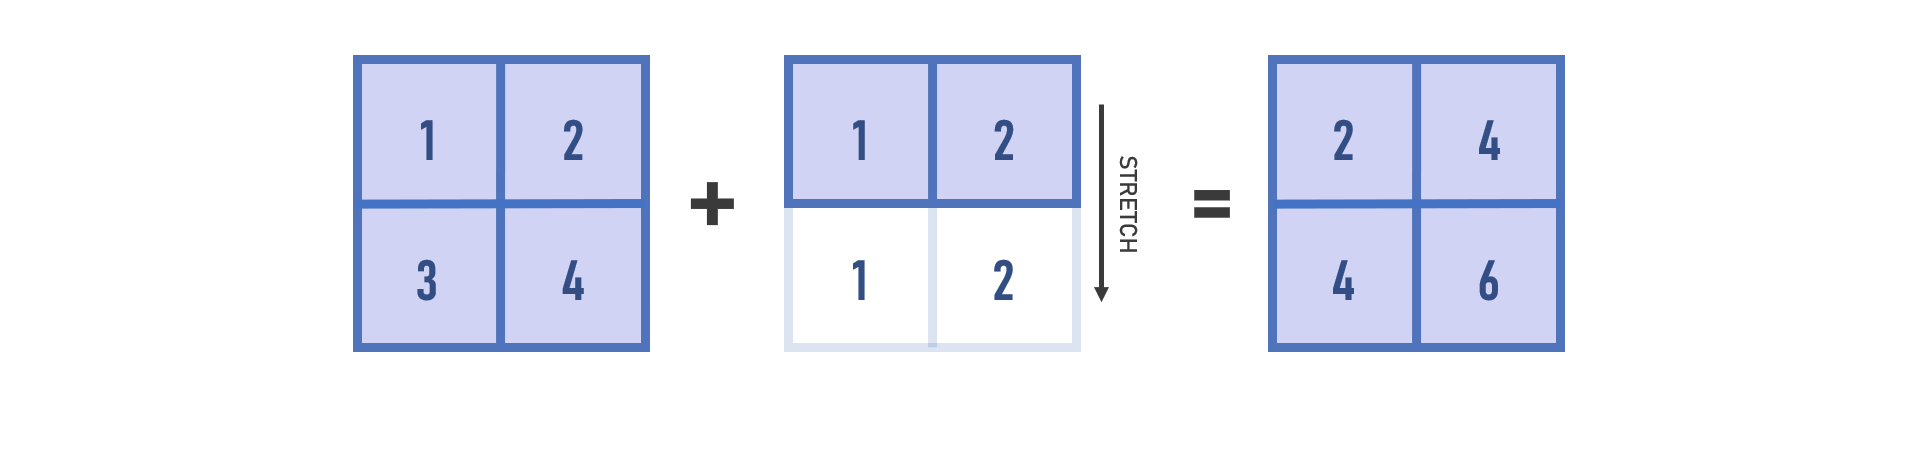

This stretching of compatible dimensions is called **Broadcasting**. We call two dimensions compatible when

* they are equal, or
* one of them is 1.

In [ ]:
m1 = np.array([[1, 2]])
m3 = np.array([[10, 20],[30, 40],[50, 60]])

m1 + m3

In [ ]:
m1 * m3

The following operation cannot be broadcasted, because their shapes are not compatible:

In [ ]:
m2 = np.array([[1, 2],[3, 4]])
m3 = np.array([[10, 20],[30, 40],[50, 60]])

m2 + m3

### Example functions

Now that we understand vectorization and broadcasting we can have a look at some functions where we apply those concepts.

The function `numpy.abs` returns the absolute value of a number. This we can apply to every element of an array with vectorization:

In [ ]:
a = np.array([-1,2,-3,4])

np.abs(a)

Another function is `numpy.log` which returns the natural logarithm of a number. By deviding it with `log(2)` we get the logarithm to base 2:

In [ ]:
a = np.array([1,2,4,8,16,32,64])

np.log(a)/np.log(2)

Some more are `numpy.sqrt()` and `numpy.exp()`:

In [ ]:
a = np.array([1,4,9,16,25,36])
np.sqrt(a)

In [ ]:
np.exp(a)

<div class="learnmore">Looking for a complete listing? See <a href="https://numpy.org/doc/stable/reference/routines.math.html">NumPy - Mathematical functions</a>.</div>

---
<a name="io"></a>
## [Array I/O](#top)

Arrays can also be read from or written to files. `numpy.loadtxt` can read text- or csv-files withoptional arguments `delimiter` (default is whitespace) and the data-type `dtype`:

In [ ]:
np.loadtxt("data/numbers.csv", delimiter = ",")

>Note that our numbers are automatically interpreted as `floats`, but can be casted to integer with the `dtype`-argument:

In [ ]:
np.loadtxt("data/numbers.csv", delimiter = ",", dtype=np.int_)

To write data to a file we use the function `numpy.savetxt`:

In [ ]:
data = np.array([[1,2,3],[2,3,4]]) 
np.savetxt("data/numbers2.csv", data, delimiter = ",")

Again, the numbers in [data/numbers2.csv](./data/numbers2.csv) are stored in a floating-point format as default. If we want to specify the format our data is stored we can use the argument `fmt` to pass a format string:

In [ ]:
data = np.array([[1,2,3],[2,3,4]]) 
np.savetxt("data/numbers2.csv", data, fmt="%d", delimiter = ",")

<div class="learnmore"><b>Read more</b>: If you are not familiar with format strings you can read more about them in the <a href="https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html">documentation</a>.</div>

Up to now we used text files with the csv-format to store the data, which leads to human readable files. But if we want to store the data in a binary-format we can use the functions `load` and `save`. They use files with the extension `.npy` which is a binary format for representing NumPy arrays:

In [ ]:
data = np.array([[1,2,3],[2,3,4]]) 
np.save("data/numbers_binary", data)

In [ ]:
np.load("data/numbers_binary.npy")

---
<a id="statisitics"></a>
## [Statistical Analysis](#top)

Machine learning methods are largely based on statistical functions. Many of basic statistical functions are implemented in NumPy. Here is a short list of only a few functions available in Numpy.

To calculate the mean of an array you can use the function `numpy.mean`:

In [ ]:
a = np.array([1,2,3,4,5,6])
np.mean(a)

The median is calculated with `numpy.median`:

In [ ]:
a = np.array([1,2,3,4,5])
np.median(a)

The variance is calculated with `numpy.var`:

In [ ]:
a = np.array([1,2,3,4,5])
np.var(a)

The standard deviation is calculated with `numpy.std`:

In [ ]:
a = np.array([1,2,3,4,5])
np.std(a)

The q-th percentile is calculated with `numpy.percentile` where q is given as an argument between 0 and 100:

In [ ]:
a = np.array([[1,2,3,4,5],[6,7,8,9,10]])
np.percentile(a,50)

<div class="learnmore">More on <a href="https://numpy.org/doc/stable/reference/routines.statistics.html">statistics in Numpy</a>.

---
<a name="linAlg"></a>
## [Linear Algebra](#top)

Now we want to have a look at how we can do linear algebra with NumPy. As you know, linear algebra deals with vector spaces and linear mappings represented by vectors and matrices. Therefore vectors and matrices are the first things we have to realize with NumPy. This is done by simply using one- or two-dimensional arrays, as we have already seen.

> **Note**: In linear algebra the dimension of a vector is equal to the amount of entries it has. In NumPy the dimension is equal to the number of axes. So a vector of any dimension is in NumPy always an array with dimension 1.

In [ ]:
vector = np.array([1,2])
matrix = np.array([[3,4],[5,6]])

### Basic Multiplication

In the section about Broadcasting we have already learned how to add vectors or matrices and how to multiply them with a scalar:

In [ ]:
vector1 = np.array([1,2])
vector2 = np.array([3,4])

(vector1 + vector2) * 2

But now we want to multiply vectors and matrices. If we simply use the standard operation for this, our arrays will get multiplied elment-wise:

In [ ]:
vector1 * vector2

Unfortunatly, in linear algebra most of the time this element-wise multiplication (also known as Hadamard product) is not the desired behavior. Often we are dealing with the dot-product of vectors. As a reminder, the dot-product of two vectors $a = (a_1, a_2, ..., a_n)$ and $b = (b_1, b_2, ..., b_n)$ is defined as follows: 

$a \cdot b = \sum_{i=1}^{n} a_ib_i = a_1b_1 + a_2b_2 + ... a_nb_n$

To calculate this expression we use the function `numpy.dot`.

In [ ]:
 np.dot(vector1, vector2)

We can also pass 2D-arrays (matrices) to the `dot`-function and it will result in the standard matrix multiplication, but this is not recommended, because mathematically the dot-product is only defined on vectors and therefore we get confusing semantics. For multiplications with matrices the function `numpy.matmul` is better suited:

In [ ]:
matrix = np.array([[1,2],[3,4]])
np.matmul(matrix, vector1)

In [ ]:
matrix = np.array([[1,2],[3,4]])
np.matmul(matrix, matrix)

A short form for `matmul` is the `@` operator:

In [ ]:
matrix @ matrix

An again, matrix multiplication must be distinguished from the element-wise multiplication of matrices:

In [ ]:
matrix * matrix

### Higher Dimensional Multiplication

This far we only looked at one- or two-dimensional arrays representing vectors and matrices. But what happens when we pass higher dimensional arrays to `dot` and `matmul`? When using `matmul` the array gets interpreted as a stack of matrices. For example a 3D-array with shape $(N,M,M)$ gets interpreted as a 1D-array with $N$ elements where each element is a matrix of size $M\times M$. 

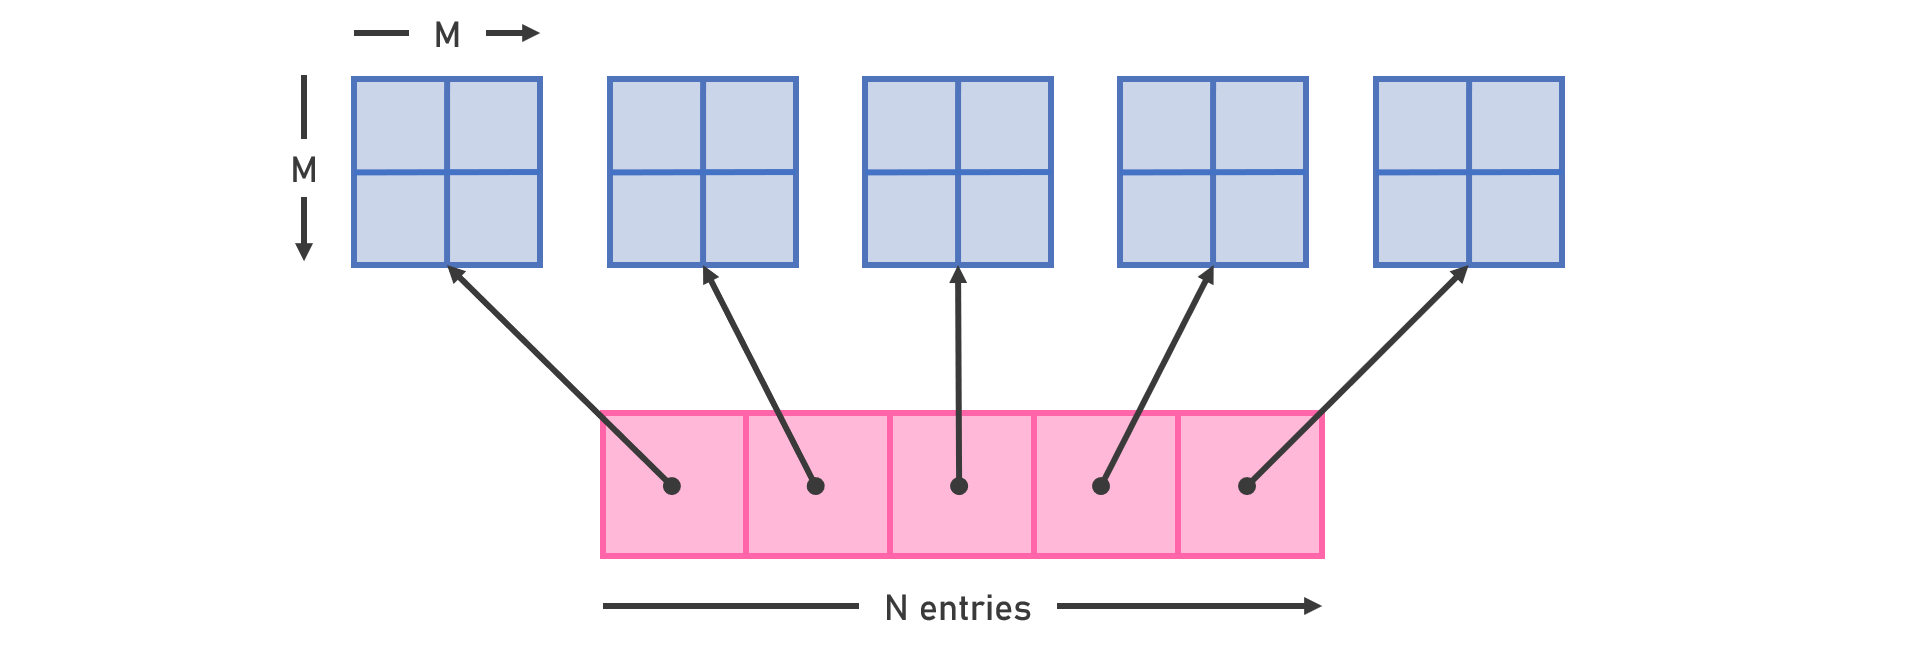

Broadcasting is then happening accordingly to this 'matrix-elements'. For example, multipling a vector to a stack of matrices will result in a stack of vectors which are the result of multiplying each matrix with the input vector:

In [ ]:
#two matrices in a stack (3D-array):
m_stack = np.array([   [[1,2],[1,2]],   [[2,1],[2,1]]   ])
v = np.array([1,2])

m_stack @ v

For `dot` the behavior on higher-dimensional arrays is different. The documentation specifies the [behavior of `matmul`](https://numpy.org/devdocs/reference/generated/numpy.matmul.html) and the [behavior of `dot`](https://numpy.org/devdocs/reference/generated/numpy.dot.html) for any dimensional input arrays, but as recommonded above, `dot` should normally not be used with dimensions higher than 1.  

### Eigenvalues and Matrix Decomposition

The submodule `numpy.linalg` contains lots of functions related to linear algebra which are used frequently in machine learning. For example the function `linalg.eig` returns the the eigenvalues and the corresponding eigenvectors of a squared matrix. The result is a 2-tuple of arrays. The first array is one-dimensional and contains the eigenvalues. The second array is two-dimensional and contains the corresponding eigenvctors where each vector is represented by one column. I.e. if the result for the input `matrix` is the tuple `(w, v)` the following expression will be true (if rounding is ignored):

```python
matrix @ v[:,0] == w[0] * v[:,0]
```

In [ ]:
w, v = np.linalg.eig(matrix)
print(matrix @ v[:,0])
print(w[0] * v[:,0])

Another frequently used function is `linalg.svd` which claculates the [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) of a given matrix.

In [ ]:
a = np.array([[1,2,3,4,5],[1,2,3,4,5]])
print(a.shape)

u, s, vh = np.linalg.svd(a, full_matrices=True)
u.shape, s.shape, vh.shape

<a name="random"></a>
## Random Number Generation

`numpy.random` is another submodule which you will use very often. 

For example the function `random.random` can generate a random float or an array of random floats uniformly from the interval $[0.0,1.0)$:

In [ ]:
from numpy import random as rn

rn.random()

In [ ]:
rn.random((2,3))

If you want to generate integer values from a given interval you can use `random.randint`. The first two arguments specify the lower (included) and upper (excluded) bounds of a interval, from which integers are chosen uniformly:

In [ ]:
rn.randint(100, 200, (10,4))

To generate numbers (floats) which are not unifromly distributed, but are a sample of the standard gaussian distribution you can use `random.randn`. (Here the shape of the result array is not given by a tuple, but by several arguments):

In [ ]:
rn.randn(2,3)

<div class="learnmore">Of course there are much more functions available. You can find them in the <a href="https://numpy.org/doc/stable/reference/random/index.html">documentation</a>.</div>

<a name="masking"></a>
## Masking and filtering

Sometimes datasets can be incomplete or contain invalid data. In such a case we want to make sure that we do not use the invalid data in our computations. For this purpose we can use the submodule `numpy.ma`. When using this package we are no longer talking about arrays, but about **masked arrays**. A masked array is a combination of an array containing our data and a mask. A mask is an array of the same shape as the data-array but containg boolean values indicating if the the corresponding data-entry is valid (not masked = False) or invalid (masked = True). The mask can also have the constant value `nomask` indicating that all the values are valid. You can create such a masked array with the function `ma.masked_array` from existing data:

In [ ]:
from numpy import ma 

a = np.arange(1,7)
masked_a = ma.masked_array(a,[0,0,0,0,0,1])
ma.mean(masked_a)

As you can see, the 6 is ignored when computing the mean, because the mask has a 1 (True) at this position. 

But giving the mask explicitly as we did is most of the time not possible, because you already have to know which elements are the invalid ones. To mask an array based on boolean conditions we can again make use of the vectorization technique we have already learned. By applying a boolean operator to every element of our array we automatically get our mask: 

In [ ]:
masked_a = ma.masked_array(a, a > 5) # second argument is a vectorized expression which returns our mask
masked_a

### Where

With this technique we can also filter our arrays with the function `numpy.where`. It requires again a condition array (which we can create with vectorization) and two data-arrays. Depending on the condition array the result array will contain the element from the first or the second data-array at a given position:

In [ ]:
np.where(a>3, a, a*10)

> Note that if we are dealing with masked arrays we have to use the `ma.where` function which is the equivalent function from the masked-module. Otherwise the default numpy function may handle the masked elements wrong. This holds for the most functions, i.e. if you are using masked arrays and there is a masked version of a function, you should use this one:

In [ ]:
# NumPy's default "where" cannot handle the mask on the 6
np.where(masked_a>3, masked_a, 0) 

In [ ]:
# numpy.ma's "where" can handle the mask on the 6
ma.where(masked_a>3, masked_a, 0)

### Select
You can also `select` items by conditions and treat each of the selected group of elements accordingly, plus giving a value for not selected elements:

In [ ]:
a = rn.randint(100, 200, (10,4))
print(a)

condition = [a<130, a<160, a>170]  # not selected 160 .. 170
treat = [a-200, a*2, a+100]
np.select(condition, treat, 0)

## Summary

Within this lecture you have made your first experiences with NumPy. This includes in particular:

* The concept and performance advantages of the NumPy array and its functions.
* The concept of Vectorization and Broadcasting to make your code more efficient and readable.
* How to store and read data to and from files.
* How to do basic statistics with NumPy.
* How to do basic linear algebra with NumPy.
* How to do basic random simulations with NumPy.
* The concept of a masked array and how to use it.